# Data ingestion and visualization

The python script 'cslib.py' supports  methods by which it extracts data from json source files, process them and transport to proper dataframe for further. The JSON files may not contain uniformly named features. So data ingestion methods takes care of this including extracting time series information:

1. fetch_data(data_dir)
2. convert_to_ts(df_orig, country=None)
3. fetch_ts(data_dir, clean=False)

This notebook uses data ingestion method fetch_data(). Then it convert year, month, day to a single datetime column and then proceeds to 'exploratory data analysis'. In the EDA, different visualization techniques are used:

1. A Distplot or distribution plot to depict the variation in the data distribution with respect price.
2. A msno.matrix (a data-dense display ) and subsequent plot to visualize the data for missing values in the dataframe.
3. relplot(), a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. The statistical relationship here is between 'date' and 'price' variables.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from cslib import fetch_data


/Users/manashsarma/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_dir = os.path.join(".","data","cs-train")
df = fetch_data(data_dir)
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,17998.0,28,489562,11,5.95,84656,1,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [3]:
df.tail()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
815006,United Kingdom,16098.0,31,562271,7,9.95,23316,1,2019,2019-07-31
815007,United Kingdom,16098.0,31,562271,7,3.75,22730,4,2019,2019-07-31
815008,United Kingdom,16098.0,31,562271,7,3.75,22725,2,2019,2019-07-31
815009,United Kingdom,NaN,31,562264,7,0.83,85199S,2,2019,2019-07-31
815010,United Kingdom,NaN,31,562264,7,3.29,22553,1,2019,2019-07-31


In [4]:
# Convert year, month, day to a datetime column
df["date"] = pd.to_datetime(df.year*10000+df.month*100+df.day, format='%Y%m%d')
df = df.drop(columns=['year', 'month', 'day'])

# Set country to a categorical type
df['country'] = df['country'].astype('category')
df['invoice'] = df['invoice'].astype('category')
df['customer_id'] = df['customer_id'].astype('category')
df['stream_id'] = df['stream_id'].astype('category')

In [5]:
# Reorder columns
df = df[['date', 'price', 'times_viewed', 'stream_id', 'country', 'customer_id', 'invoice']]

# Remove outliers
df = df[df['price'].between(df['price'].quantile(0.02), df['price'].quantile(0.98))]
    
df

,date,price,times_viewed,stream_id,country,customer_id,invoice
0,2017-11-28,5.95,1,84656,United Kingdom,17998.0,489562
1,2017-11-28,6.75,12,79323W,United Kingdom,13085.0,489434
2,2017-11-28,2.10,21,22041,United Kingdom,13085.0,489434
3,2017-11-28,1.25,5,21232,United Kingdom,13085.0,489434
4,2017-11-28,1.65,17,22064,United Kingdom,13085.0,489434
...,...,...,...,...,...,...,...
815006,2019-07-31,9.95,1,23316,United Kingdom,16098.0,562271
815007,2019-07-31,3.75,4,22730,United Kingdom,16098.0,562271
815008,2019-07-31,3.75,2,22725,United Kingdom,16098.0,562271
815009,2019-07-31,0.83,2,85199S,United Kingdom,NaN,562264


In [6]:
df['invoice'].value_counts()

537434    1298
538071    1250
537638    1170
537823    1148
537237    1146
          ... 
508638       0
496744       0
556289       0
496746       0
527600       0
Name: invoice, Length: 42646, dtype: int64

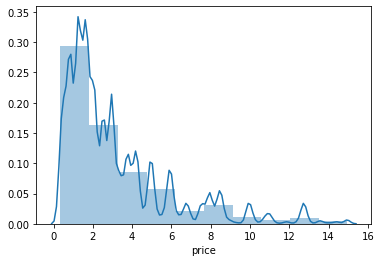

In [7]:
sns.distplot(df['price'], bins=10)

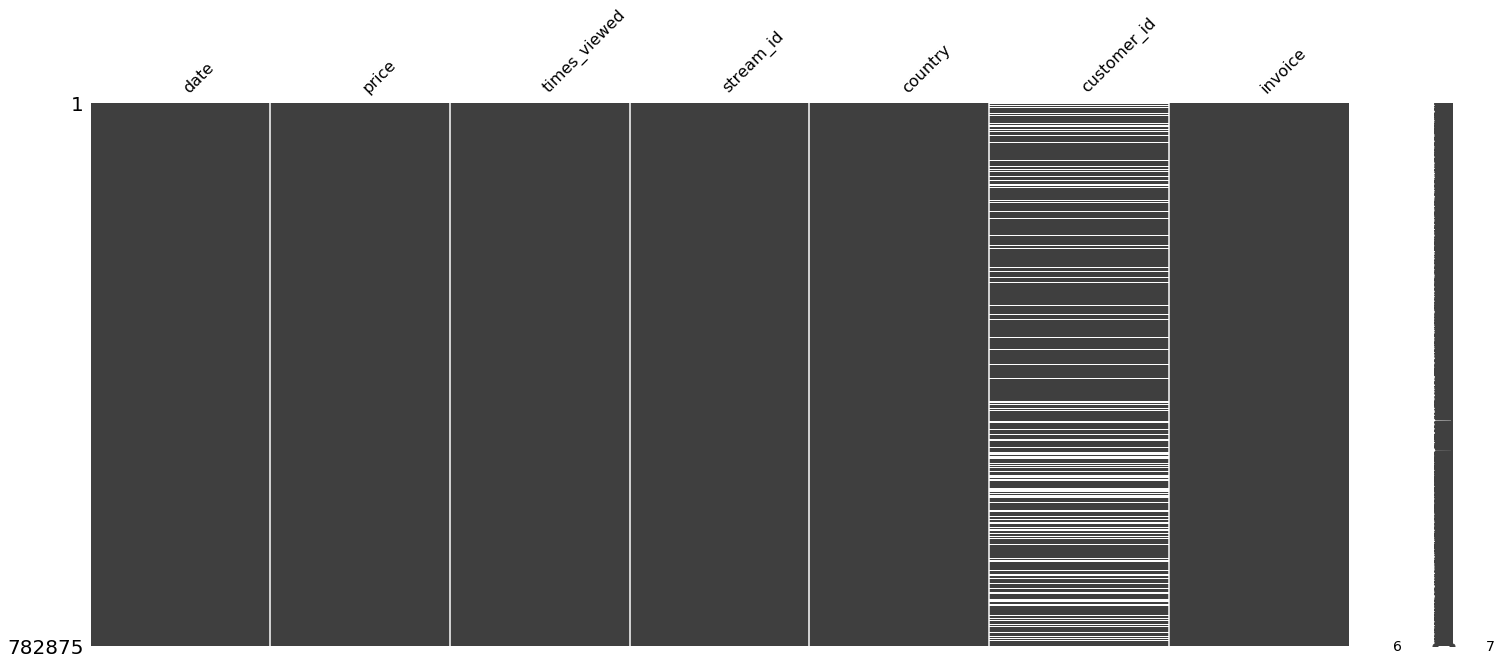

In [8]:
msno.matrix(df)
plt.show()

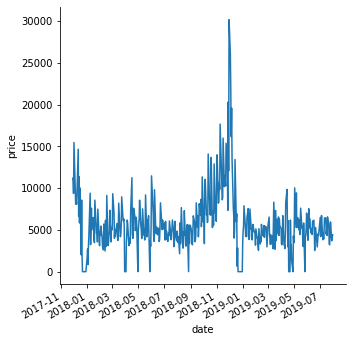

In [9]:
g = sns.relplot(x='date', y='price', data=df.groupby(pd.Grouper(key='date', freq='B')).sum().reset_index(), kind='line')
g.fig.autofmt_xdate()

In [10]:
revenue_by_country = df[['country', 'price']].groupby('country').sum().sort_values('price', ascending=False)
revenue_by_country = revenue_by_country.rename(columns={'price': 'revenue'})
revenue_by_country = revenue_by_country.reset_index()
revenue_by_country.head()

,country,revenue
0,United Kingdom,2.293894e+06
1,EIRE,4.399854e+04
2,Germany,3.425095e+04
3,France,2.401081e+04
4,Netherlands,8.428490e+03


In [11]:
revenue_by_country.index

RangeIndex(start=0, stop=43, step=1)

In [12]:
df['country'].value_counts()

United Kingdom          722329
EIRE                     12992
Germany                  12593
France                    9228
Netherlands               3891
Spain                     2483
Switzerland               2221
Belgium                   2008
Portugal                  1743
Australia                 1495
Channel Islands           1221
Sweden                    1089
Italy                     1004
Cyprus                     878
Norway                     724
Finland                    702
Austria                    675
Greece                     612
Unspecified                599
Denmark                    553
Japan                      500
United Arab Emirates       435
Poland                     424
Singapore                  291
Hong Kong                  265
USA                        263
Canada                     212
Malta                      210
Iceland                    193
Lithuania                  188
Israel                     137
Bahrain                    126
RSA     